## **MNIST 데이터셋을 이용해 합성곱 신경망(CNN) 모델을 학습**

### 1. 라이브러리 임포트 및 초기 설정

In [8]:
conda install torchvision

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\USER\Anaconda_

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       haa95532_0         130 KB
    conda-24.9.2               |   py38haa95532_0         928 KB
    libuv-1.48.0               |       h827c3e9_0         322 KB
    openssl-3.0.16             |       h3f729d1_0         7.8 MB
    pytorch-2.3.0              |cpu_py38h482c993_1       111.2 MB
    torchvision-0.18.1         |cpu_py38h9788fc5_0         9.3 MB
    ------------------------------------------------------------
                                           Total:       129.6 MB

The following NEW packages will be INSTALLED:

  libuv              pkgs/main/win-64::libuv-1.48.0-h


InvalidArchiveError("Error with archive C:\\Users\\USER\\Anaconda_\\pkgs\\pytorch-2.3.0-cpu_py38h482c993_1.conda.  You probably need to delete and re-download or re-create this file.  Message was:\n\nfailed with error: [Errno 13] Permission denied: 'C:\\\\Users\\\\USER\\\\Anaconda_\\\\pkgs\\\\pytorch-2.3.0-cpu_py38h482c993_1\\\\Lib\\\\site-packages\\\\torch\\\\include\\\\ATen\\\\ops\\\\divide_native.h'")



In [1]:
import torch
from torch.autograd import Variable
import torchvision.datasets as dsets # MNIST 데이터셋을 불러오기
import torchvision.transforms as transforms
import torch.nn.init

torch.manual_seed(777)  # reproducibility

### 2. 파라미터 설정

In [3]:
learning_rate = 0.001 # 학습률
training_epochs = 10 # 학습 반복 횟수
batch_size = 64 # 한 번에 학습할 데이터 샘플의 수


### 3. MNIST 데이터셋 로드

In [6]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:11<00:00, 887339.16it/s] 


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 57909.01it/s]


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:06<00:00, 249354.92it/s]


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 3279485.07it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [7]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)


### 4. CNN 모델 정의
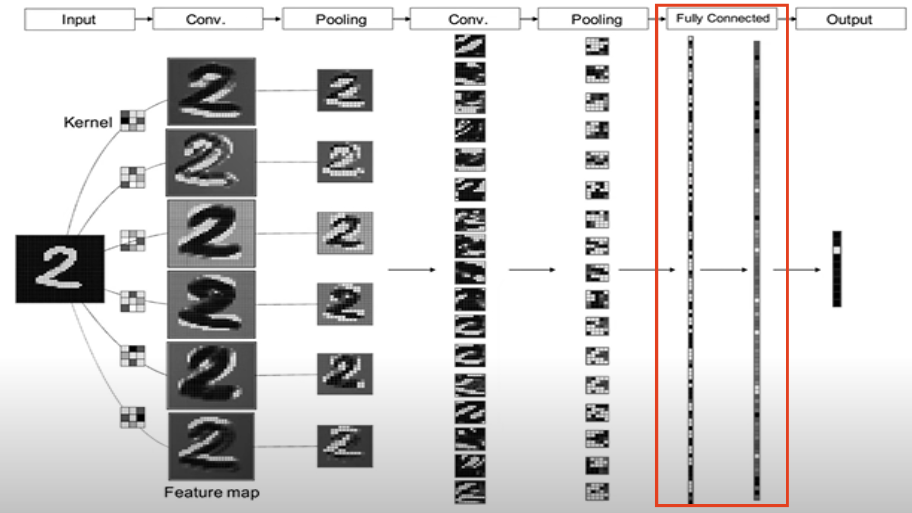

## ✍ 문제1 : 주어진 코드에서 CNN 모델을 구현하시오. 아래 요구사항을 반영하여 빈칸을 완성하시오.

### (요구사항)
1.합성곱 층 (Convolutional Layer)을 두 개 사용

2.첫 번째 합성곱 층의 입력 채널은 1, 출력 채널은 32, 커널 크기는 3, 패딩 1, 스트라이드는 1로 설정하세요.

nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

3.두 번째 합성곱 층의 입력 채널은 32, 출력 채널은 64, 커널 크기는 3, 패딩 1, 스트라이드는 1로 설정하세요.

nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

4.각 합성곱 층 뒤에는 ReLU 활성화 함수와 MaxPooling을 추가합니다.

        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)

        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)

        # 풀링 크기: 2x2, 스트라이드: 2

5.마지막에는 Fully Connected Layer를 추가하여 10개의 클래스를 예측하도록 설정합니다.
        # Final FC 7x7x64 inputs -> 10 outputs

6.가중치 초기화를 설정하세요.

In [10]:
# CNN Model (2 conv layers)

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # 첫 번째 합성곱 층
        self.layer1 = torch.nn.Sequential(
            # Conv Layer
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            # Activation Function
            torch.nn.ReLU(),
            # Max Pooling
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두 번째 합성곱 층
        self.layer2 = torch.nn.Sequential(
            # Conv Layer
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            # Activation Function
            torch.nn.ReLU(),
            # Max Pooling
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # Fully connected layer
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)
        torch.nn.init.kaiming_normal_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Flatten for fully connected layer
        out = self.fc(out)
        return out


## ✍ 문제2.초기화
####주어진 CNN 구조에서 ReLU 활성화 함수가 사용되고 있다. weight initialization을 위해 어떤 초기화 기법을 사용했는지 쓰고, 그 이유에 대해 설명해보시오.

answer: relu함수를 이용했기 때문에 출력층의 분산이 xavier_initialization을 써도 줄어들 수 있기 때문에 He_initialization을 사용하였다.

### 6. 모델, 손실 함수 및 옵티마이저 정의

In [13]:
model = CNN()
criterion = torch.nn.CrossEntropyLoss()  # 다중 클래스 분류 문제에서 사용하는 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


### 7. 모델 학습

In [15]:
print('Learning started')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size

    for i, (batch_xs, batch_ys) in enumerate(data_loader):
        X = Variable(batch_xs)
        Y = Variable(batch_ys)

        # Grad 초기화
        optimizer.zero_grad()

        # 모델 예측
        hypothesis = model(X)

        # 비용 계산
        cost = criterion(hypothesis, Y)

        # 비용을 역전파하여 가중치 업데이트
        cost.backward()
        optimizer.step()

        avg_cost += cost.data / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))

print('Learning Finished!')


Learning started
[Epoch:    1] cost = 0.178292632
[Epoch:    2] cost = 0.0549830198
[Epoch:    3] cost = 0.0412106253
[Epoch:    4] cost = 0.0323339179
[Epoch:    5] cost = 0.0266429242
[Epoch:    6] cost = 0.0215246994
[Epoch:    7] cost = 0.0169974416
[Epoch:    8] cost = 0.013995124
[Epoch:    9] cost = 0.0116510876
[Epoch:   10] cost = 0.00928663742
Learning Finished!


### 8. 모델 평가 (테스트)

In [16]:
model.eval()
X_test = Variable(mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float())
Y_test = Variable(mnist_test.test_labels)

prediction = model(X_test)
correct_prediction = (torch.max(prediction.data, 1)[1] == Y_test.data)
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy)


C:\Users\USER\Anaconda_\lib\site-packages\torchvision\datasets\mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\USER\Anaconda_\lib\site-packages\torchvision\datasets\mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: tensor(0.9850)


### 9. 랜덤 테스트 이미지 예측
테스트 데이터셋에서 임의로 하나의 이미지를 선택하여 예측 진행

Ground Truth: tensor([6])
prediction: tensor([[  155.6550, -5348.2266, -2475.8420, -6454.7266,  -716.9034, -3195.0925,
          5811.8389, -4188.0708, -3314.0557, -6111.5269]],
       grad_fn=<AddmmBackward0>)
predicted_label: tensor([6])


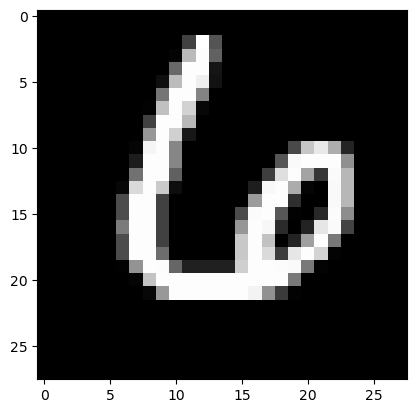

In [17]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
X_test = Variable(mnist_test.data[r:r+1].view(-1, 1, 28, 28).float())
Y_test = Variable(mnist_test.targets[r:r+1])
print("Ground Truth:", Y_test)
prediction = model(X_test)
predicted_label = (torch.max(prediction.data, 1)[1])
print('prediction:', prediction)
print('predicted_label:', predicted_label)
img = X_test.reshape(28,28).numpy()
plt.imshow(img,cmap='gray')
plt.show()

## **attention 기본 구조 이해하기**
###✍ 문제3: 다음 코드의 빈칸을 채우고 코드를 실행해보세요.


In [21]:
import torch
import torch.nn.functional as F

# attention 구조
def simple_attention(query, key, value):
    # query와 key의 내적
    scores = torch.matmul(query, key.transpose(-2, -1))

    # 이 값을 Softmax를 통과시켜 attention score를 구함
    attention_score = F.softmax(scores, dim=-1)

    # attention score를 value에 곱하여 결과를 도출
    output = torch.matmul(attention_score, value)

    return output, attention_score

# 예시 데이터 (임의의 작은 tensor 사용)
query = torch.tensor([[1.0, 0.0], [0.0, 1.0]])
key = torch.tensor([[1.0, 0.0], [0.0, 1.0]])
value = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# attention 계산
output, attention_score = simple_attention(query, key, value)

# 결과 출력
print("Attention Scores:")
print(attention_score)
print("\nOutput:")
print(output)

Attention Scores:
tensor([[0.7311, 0.2689],
        [0.2689, 0.7311]])

Output:
tensor([[1.5379, 2.5379],
        [2.4621, 3.4621]])


###✍문제4 : 출력 결과를 해석해보세요.

hint: 몇 번째 query와 몇 번째 key의 유사도는 ____%이다.

answer:attention scores행렬을 봤을 때 각 성분 인덱스 에서 첫번째 성분(행)은 query를 의미하고 두번째성분(열)은 key를 의미하며 행렬의 성분은 유사도를 의미한다.

## **DNN Optimizer 진행**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [26]:
cancer=datasets.load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target']=cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [27]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
cancer_scaled=SS.fit_transform(cancer.data)
input=cancer_scaled
output=df['target']

In [28]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input,output)

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
DNN=Sequential()
DNN.add(Dense(100,activation="relu"))
DNN.add(Dense(1,activation="sigmoid"))
DNN.compile(loss="mean_squared_error", metrics=['accuracy'], optimizer="Adam")

In [37]:
DNN.fit(train_input,train_output,epochs=10, batch_size=50)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.6831
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9108
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9437
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9577
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9624
Epoch 6/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9765
Epoch 7/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9789
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9789
Epoch 9/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9812
Epoch 10/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9789


### ✍ 문제5. 위 코드에서 어떤 optimizer를 썼을지 생각하여 optimizer 빈칸을 채우고, 그 빈칸이 나온 이유에 대해 설명해보세요. (ppt에서 배운 optimizer들 최대한 하나씩 넣어서 진행해보고 최적의 optimizer에 대한 근거를 설명해보시오)

hint : adam이 안나왔을 경우, epoch나 batch size 등을 조절해보세요

answer: rmsprop과 momentum의 장점을 합쳐 momentum의 관성으로 인해 누적된 관성 때문에 최적해를 지나칠 수 있지만 rmsprop을 통해 현재와 과거의 기울기의 가중치 비중을 정할 수 있기 때문에 최적해를 지나치는 일을 방지할 수 있다. 또한 rmsprop이 고려하지 않는 누적된 기울기의 방향성을 momentum이 가지고있기 때문에 rmsprop보다 더 빠르게 수렴할 수 있다.